In [632]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium 
import geocoder

In [633]:
CLIENT_ID = 'LUH5C5M1TQVF0CO5HDOYL2OUJZNIYT5OTJJN5ODADB2MZSHH' # Foursquare ID
CLIENT_SECRET = '0NKLQCRXL4R4P2BCA5RNQ0TOXNBX0ETXGWCFE1I453V453DX' # Foursquare Secret
VERSION = '20210106' # Foursquare API version

limit=100

# Make an empty map
map_of_city_Skopje = folium.Map(location=[41.996104045108254,21.431439469129984], zoom_start=13)

In [634]:
#url = 'https://api.foursquare.com/v2/venues/explore?query:restorant&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(

def get_venues(lat,lng,radius):
    
    url = 'https://api.foursquare.com/v2/venues/explore?query:restorant&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit,
            )



    results = requests.get(url).json()["response"]['groups'][0]['items']

    venues_list=[]
    total_venues=[]



    for item in results:
        venues_list=[]
        name=item['venue']['name'] 
        lat=item['venue']['location']['lat'] 
        lng=item['venue']['location']['lng']
        tip=item['venue']['categories'][0]['name']
        venues_list.append(name)
        venues_list.append(lat)
        venues_list.append(lng)
        venues_list.append(tip)
        total_venues.append(venues_list)

        df_total=pd.DataFrame(total_venues, columns=['name', 'lat', 'lng','categories'])


        df_total.append(df_total)
    
        df_total_Restaurants = df_total.loc[ \
                                    (df_total['categories'] == 'Restaurant') \
                                    |(df_total['categories'] == 'Eastern European Restaurant') \
                                    |(df_total['categories'] == 'Modern European Restaurant') \
                                    |(df_total['categories'] == 'Comfort Food Restaurant') \
                                    |(df_total['categories'] == 'Mexican Restaurant') \
                                    |(df_total['categories'] == 'Italian Restaurant') \
                                    |(df_total['categories'] == 'Sushi Restaurant') \
                                    |(df_total['categories'] == 'Seafood Restaurant')\
                                    |(df_total['categories'] == 'Vegetarian / Vegan Restaurant')\
                                    |(df_total['categories'] == 'Chinese Restaurant')\
                                    |(df_total['categories'] == 'French Restaurant')\
                                    |(df_total['categories'] == 'Cuban Restaurant')\
                                    |(df_total['categories'] == 'Latin American Restaurant')\
                                    |(df_total['categories'] == 'Fast Food Restaurant')\
                                    |(df_total['categories'] == 'Turkish Restaurant')\
                                    |(df_total['categories'] == 'Mediterranean Restaurant')\
                                    |(df_total['categories'] == 'Indian Restaurant')       
                                            
                                                                        
                                  ]
        
        df_total_Others = df_total.loc[ \
                                    (df_total['categories'] == 'Cafeteria')\
                                    |(df_total['categories'] == 'Dessert Shop')\
                                    |(df_total['categories'] == 'Irish Pub')\
                                    |(df_total['categories'] == 'Pizza Place') \
                                    |(df_total['categories'] == 'Fish & Chips Shop')\
                                    |(df_total['categories'] == 'BBQ Joint') \
                                    |(df_total['categories'] == 'Lounge') \
                                    |(df_total['categories'] == 'Bistro') \
                                    |(df_total['categories'] == 'Gastropub') \
                                    |(df_total['categories'] == 'Bakery')\
                                    |(df_total['categories'] == 'Café')\
                                    |(df_total['categories'] == 'Coffee Shop')\
                                    |(df_total['categories'] == 'Salad Place')\
                                    |(df_total['categories'] == 'Diner')
 
                                    
                                    
                                  ]

    return df_total_Restaurants, df_total_Others

## MUNICIPALITY / "CENTAR" ... THIS IS 1th NEIGHBORHOOD FOR ANALYSIS

In [635]:
df_Sk_area=pd.read_csv("MUNICIPALITIES_of_SKOPJE.csv")
#print(df_Sk_area)

print("latitude & longitude FOR MUNICIPALITY 'CENTAR' ARE:")

lat=df_Sk_area.iat[0, 1]
lng=df_Sk_area.iat[0, 2]
radius=df_Sk_area.iat[0, 3]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants, df_total_Others=get_venues(lat,lng,radius)


latitude & longitude FOR MUNICIPALITY 'CENTAR' ARE:
latitude is 41.991284173756256
longitude is 21.421387535169046
radius of interest is around: 2000 meters


<b>LIST OF RETtORANTS IN MUNICIPALITY 'CENTAR'<b>

In [636]:
df_total_Restaurants

,name,lat,lng,categories
1,Daily Food&Wine,41.992922,21.418948,Restaurant
15,Гостилница Дукат,41.994964,21.412954,Restaurant
19,Воденица Мулино / Vodenica Mulino,41.994877,21.413535,Mediterranean Restaurant
21,Amigos Cantina,41.993294,21.430254,Mexican Restaurant
33,Star Ocean (Ramstore Mall),41.991389,21.428023,Chinese Restaurant
39,Пелистер / Pelister,41.995487,21.431384,Restaurant
43,Sushico,41.999744,21.423780,Sushi Restaurant
58,Баба Цана,41.986876,21.419364,Eastern European Restaurant
61,Distrikt,41.996308,21.430672,Restaurant
63,La Terrazza,41.995288,21.431934,Italian Restaurant


<b>LIST OF OTHER SIMULAR OBJECTS IN MUNICIPALITY 'CENTAR'<b>

In [637]:
df_total_Others

,name,lat,lng,categories
0,Rendezvous,41.991480,21.422577,Café
4,SOHO House,41.993032,21.416261,Café
5,Balilla,41.992254,21.416543,Pizza Place
8,Излет,41.997094,21.424210,Café
13,Intermezzo Privé,41.994727,21.414115,Café
17,Фурна Св. Никола,41.990380,21.420531,Bakery
20,Горки,41.996411,21.427940,Café
26,Цреша Бар / Cresha Bar,41.998781,21.418700,Café
29,Челик,41.993732,21.411581,Salad Place
31,Executive Lounge of Skopje Marriott Hotel,41.996092,21.430597,Lounge


<b> NUMBER OF RESTORANTS IN MUNICIPALITY 'CENTAR' SORTED BY TYPE<b>

In [638]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
print(df_categories)

                             number_of_objects
categories                                    
Chinese Restaurant                           1
Eastern European Restaurant                  2
French Restaurant                            1
Italian Restaurant                           3
Mediterranean Restaurant                     1
Mexican Restaurant                           1
Restaurant                                   6
Seafood Restaurant                           1
Sushi Restaurant                             1


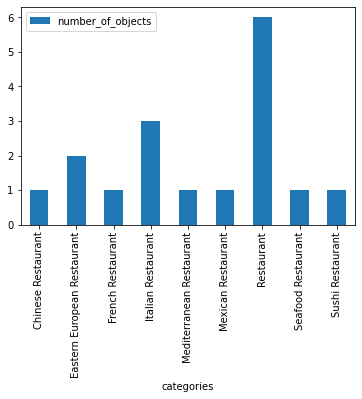

In [639]:
ax = df_categories.plot.bar()

<b>ADD RESTORANTS LOCATION ON MAP<b>

In [640]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'],icon=folium.Icon(color='red')).add_to(map_of_city_Skopje )

  

## MUNICIPALITY "KARPOS" ...  THIS IS 2nd NEIGHBORHOOD FOR ANALYSIS

In [641]:
print("latitude & longitude FOR MUNICIPALITY 'KARPOS' ARE:")

lat=df_Sk_area.iat[1, 1]
lng=df_Sk_area.iat[1, 2]
radius=df_Sk_area.iat[1, 3]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants, df_total_Others=get_venues(lat,lng,radius)


latitude & longitude FOR MUNICIPALITY 'KARPOS' ARE:
latitude is 42.001449893530676
longitude is 21.393167606918162
radius of interest is around: 2250 meters


<b>LIST OF RESTORANTS IN MUNICIPALITY 'KARPOS'<b>

In [642]:
df_total_Restaurants

,name,lat,lng,categories
2,Veneto,42.003903,21.392323,Italian Restaurant
12,Olive,42.001480,21.401268,Italian Restaurant
27,Kaj Dule,41.995319,21.398982,Seafood Restaurant
30,Барбакан / Barbakan,42.006322,21.406306,Restaurant
36,Sidro 2,42.004669,21.394725,Seafood Restaurant
42,Кај Чичо 2,42.009023,21.385669,Mediterranean Restaurant
60,Гостилница Дукат,41.994964,21.412954,Restaurant
70,Meana B,42.012415,21.409965,Eastern European Restaurant
71,Воденица Мулино / Vodenica Mulino,41.994877,21.413535,Mediterranean Restaurant
89,Гостилница Чашка,41.995454,21.398548,Comfort Food Restaurant


<b>LIST OF OTHER SIMULAR OBJECTS IN MUNICIPALITY 'KARPOS'<b>

In [643]:
df_total_Others

,name,lat,lng,categories
1,Скара Бар,42.001671,21.392357,BBQ Joint
6,Енрико,42.003116,21.399441,Pizza Place
9,Forza Café & Restaurant,41.999655,21.390962,Café
15,Ch2pter,42.004705,21.390654,Lounge
17,КафеСтудио 7Гр.,42.002984,21.398973,Coffee Shop
22,Ресторан Македонска Куќа,41.995963,21.402388,BBQ Joint
23,Play Caffe,42.003890,21.392382,Café
26,Martini,42.003279,21.400084,Lounge
28,Giovani,42.003428,21.399207,Café
31,Krem Caffe ★,42.004706,21.393720,Coffee Shop


<b>NUMBER OF RESTORANTS IN MUNICIPALITY 'KARPOS' SORTED BY TYPE<b>

In [644]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
Comfort Food Restaurant,1
Eastern European Restaurant,1
Italian Restaurant,2
Mediterranean Restaurant,2
Restaurant,2
Seafood Restaurant,2


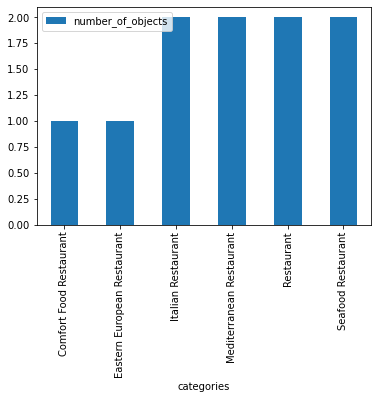

In [645]:
ax = df_categories.plot.bar()

<b>ADD RESTORANTS LOCATIONS ON MAP<b>

In [646]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='blue')).add_to(map_of_city_Skopje)


## MUNICIPALITY "AERODROM" ... THIS IS 3rd NEIGHBORHOOD FOR ANALYSIS


In [647]:
df_Sk_area=pd.read_csv("MUNICIPALITIES_of_SKOPJE.csv")
#print(df_Sk_area)

print("latitude & longitude FOR MUNICIPALITY 'AERODROM' ARE:")

lat=df_Sk_area.iat[2, 1]
lng=df_Sk_area.iat[2, 2]
radius=df_Sk_area.iat[2, 3]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants, df_total_Others=get_venues(lat,lng,radius)


latitude & longitude FOR MUNICIPALITY 'AERODROM' ARE:
latitude is 41.98534525279217
longitude is 21.466039944537595
radius of interest is around: 2000 meters


<b>LIST OF RESTORANTS IN MUNICIPALITY 'AERODROM'<b>

In [648]:
df_total_Restaurants

,name,lat,lng,categories
4,Deja Vu (Capitol Mall),41.985841,21.466124,Italian Restaurant
11,Сендвичара 7-ца (Аеродром),41.989378,21.459498,Fast Food Restaurant
16,Equilibrium Restaurant & Coffee Bar,41.986579,21.454279,Modern European Restaurant
28,Ap Ap Lap,41.983679,21.464519,Restaurant
30,Big Fish,41.989719,21.459630,Restaurant
32,De Gama,41.985338,21.465785,Restaurant
33,Гостилница Трокадеро,41.989803,21.459913,Comfort Food Restaurant
40,Restoran Firma,41.983433,21.458360,Restaurant
49,Ресторан Дојрана,41.997811,21.460023,Restaurant
54,Bisera,41.984868,21.458761,Restaurant


<b>LIST OF OTHER SIMULAR OBJECTS IN MUNICIPALITY 'AERODROM'<b>

In [649]:
df_total_Others

,name,lat,lng,categories
12,Pastrmajlija & Grill House,41.986767,21.465098,BBQ Joint
18,La Strega Espresso Bar,41.988382,21.454634,Coffee Shop
22,Every Day Coffee Shop,41.989492,21.475901,Café
24,Слаткарница „Палма“ (Аеродром),41.988622,21.453096,Dessert Shop
27,БАР ОН,41.984927,21.465312,Café
34,Domino's Pizza (Аеродром),41.983635,21.469844,Pizza Place
35,Trend Gastro Bar,41.985969,21.464393,Gastropub
36,Block Cafe,41.987537,21.451182,Lounge
37,Baking Bread,41.981119,21.470760,Bakery
38,Kono Pizza,41.990983,21.464922,Pizza Place


<b>NUMBER OF RESTORANTS IN MUNICIPALITY 'CENTAR' SORTED BY TYPE<b>

In [650]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
Comfort Food Restaurant,1
Eastern European Restaurant,1
Fast Food Restaurant,2
Italian Restaurant,1
Modern European Restaurant,1
Restaurant,9


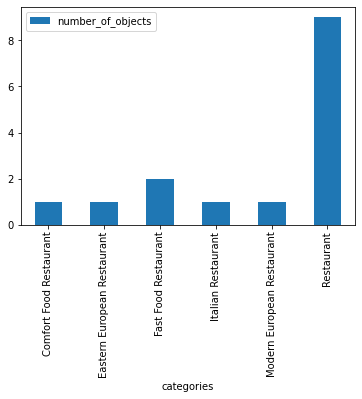

In [651]:
ax = df_categories.plot.bar()

<b>ADD RESTORANTS LOCATION ON MAP<b>

In [652]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'],icon=folium.Icon(color='green')).add_to(map_of_city_Skopje)


## MUNICIPALITY "GAZI BABA" ...  THIS IS 4th NEIGHBORHOOD FOR ANALYSIS

In [653]:
df_Sk_area=pd.read_csv("MUNICIPALITIES_of_SKOPJE.csv")
print("latitude & longitude FOR MUNICIPALITY 'GAZI BABA' ARE:")

lat=df_Sk_area.iat[3, 1]
lng=df_Sk_area.iat[3, 2]
radius=df_Sk_area.iat[3, 3]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants, df_total_Others=get_venues(lat,lng,radius)

latitude & longitude FOR MUNICIPALITY 'GAZI BABA' ARE:
latitude is 42.0078525332411
longitude is 21.494612506119612
radius of interest is around: 2600 meters


<b>LIST OF RESTORANTS IN MUNICIPALITY 'GAZI BABA'<b>

In [654]:
df_total_Restaurants

,name,lat,lng,categories
0,The Hunters Lodge Kamnik,42.007225,21.487254,Restaurant
2,Вели Ив / Veli Iv,42.004362,21.504896,Restaurant
19,"""City"" Fast Food",42.006336,21.503229,Fast Food Restaurant
24,TeSameti,42.011744,21.510583,Restaurant
34,Гостилница Кмет,41.990306,21.497023,Restaurant


<b>LIST OF OTHER SIMULAR OBJECTS IN MUNICIPALITY 'GAZI BABA'<b>

In [655]:
df_total_Others

,name,lat,lng,categories
1,Пекара Ден/Дезо,41.998817,21.495692,Bakery
3,Slatkarnica Sharlota,42.002012,21.492110,Dessert Shop
4,Gostilnica Jato 90,42.001506,21.499063,BBQ Joint
5,Тохе,42.004173,21.465784,Bakery
6,Every Day Coffee Shop,41.989492,21.475901,Café
8,Caffe Kremisimo,41.995178,21.509927,Café
16,Rimini,42.002977,21.464421,Pizza Place
29,Pista,41.989513,21.476319,Café
30,Mralino,42.013503,21.514909,Bistro
31,Брејк Кафе,42.002431,21.473681,Lounge


<b>NUMBER OF RESTORANTS IN MUNICIPALITY 'GAZI BABA' SORTED BY TYPE<b>

In [656]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
Fast Food Restaurant,1
Restaurant,4


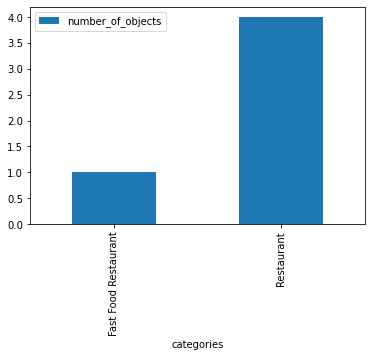

In [657]:
ax = df_categories.plot.bar()

<b>ADD RESTORANTS LOCATION ON MAP<b>

In [658]:
                      
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='orange')).add_to(map_of_city_Skopje)


## MUNICIPALITY "BUTEL" ...  THIS IS 5th NEIGHBORHOOD FOR ANALYSIS

In [659]:
df_Sk_area=pd.read_csv("MUNICIPALITIES_of_SKOPJE.csv")
#print(df_Sk_area)

print("latitude & longitude FOR MUNICIPALITY 'BUTEL' ARE:")

lat=df_Sk_area.iat[4, 1]
lng=df_Sk_area.iat[4, 2]
radius=df_Sk_area.iat[4, 3]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants, df_total_Others=get_venues(lat,lng,radius)

latitude & longitude FOR MUNICIPALITY 'BUTEL' ARE:
latitude is 42.028850023542816
longitude is 21.435746865894515
radius of interest is around: 2600 meters


<b>LIST OF RESTORANTS IN MUNICIPALITY 'BUTEL'<b>

In [660]:
df_total_Restaurants

,name,lat,lng,categories
4,Balkan Tantuni,42.009989,21.444154,Comfort Food Restaurant
9,Hamza Doner - Хамза Донер,42.007794,21.443008,Turkish Restaurant
10,Plaset Döner Çair,42.011974,21.444904,Turkish Restaurant
13,Gostilnica BERAT,42.022910,21.433925,Turkish Restaurant
19,Avanti,42.025604,21.429436,Restaurant
22,Пчела Кебапчилница,42.012407,21.445148,Eastern European Restaurant
23,"Restaurant ""Jafa""",42.027551,21.440643,Restaurant
40,Casablanca,42.007115,21.426275,Comfort Food Restaurant


<b>LIST OF OTHER SIMULAR OBJECTS IN MUNICIPALITY 'BUTEL'<b>

In [661]:
df_total_Others

,name,lat,lng,categories
0,Bajka Lounge Bar,42.030797,21.444362,Lounge
5,Burek Bosna,42.022389,21.432790,Bakery
7,Albion FC,42.022227,21.443749,Café
8,TWINS Kitchen & Wine,42.006659,21.426965,Lounge
11,Фурна Чаир,42.012050,21.444903,Bakery
16,Amigos Cafe Butel 2,42.024262,21.449511,Café
25,DEA,42.017102,21.444612,Café
26,Alinea,42.015849,21.434347,Café
28,Restoran New Star,42.042495,21.411551,Diner
34,Pinocchio,42.041525,21.421863,Pizza Place


<b>NUMBER OF RESTORANTS IN MUNICIPALITY 'BUTEL' SORTED BY TYPE<b>

In [662]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
Comfort Food Restaurant,2
Eastern European Restaurant,1
Restaurant,2
Turkish Restaurant,3


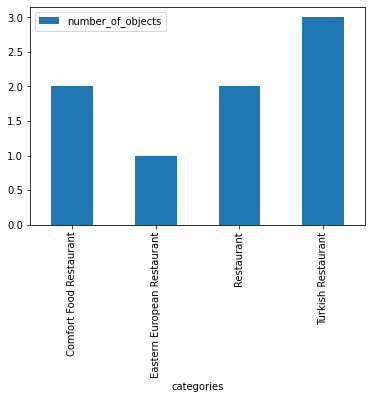

In [663]:
ax = df_categories.plot.bar()

<b>ADD RESTORANTS LOCATION ON MAP<b>

In [664]:
                       
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='lightgray')).add_to(map_of_city_Skopje)


## MUNICIPALITY "KISELA VODA" ... THIS IS 6th NEIGHBORHOOD FOR ANALYSIS

In [665]:
df_Sk_area=pd.read_csv("MUNICIPALITIES_of_SKOPJE.csv")
#print(df_Sk_area)

print("latitude & longitude FOR MUNICIPALITY 'KISELA VODA' ARE:")

lat=df_Sk_area.iat[5, 1]
lng=df_Sk_area.iat[5, 2]
radius=df_Sk_area.iat[5, 3]

print("latitude is", lat)
print("longitude is", lng)
print("radius of interest is around:" , radius, "meters")

df_total_Restaurants, df_total_Others=get_venues(lat,lng,radius)

latitude & longitude FOR MUNICIPALITY 'KISELA VODA' ARE:
latitude is 41.969574484880425
longitude is 21.441664619557955
radius of interest is around: 2000 meters


<b>LIST OF RESTORANTS IN MUNICIPALITY 'KISELA VODA'<b>

In [666]:
df_total_Restaurants

,name,lat,lng,categories
5,Канапе Кетеринг / Kanape Ketering,41.974182,21.445564,Restaurant
26,Ресторан Бисера - Ив,41.986832,21.436918,Seafood Restaurant
34,Тарапана,41.972891,21.456405,Eastern European Restaurant
39,Firko,41.985325,21.451983,Restaurant


<b>LIST OF OTHER SIMULAR OBJECTS IN MUNICIPALITY 'KISELA VODA'<b>

In [667]:
df_total_Others

,name,lat,lng,categories
0,Get,41.972729,21.444987,Café
2,Face Caffe,41.973966,21.443536,Café
13,Kafe Bar Logo,41.976156,21.445150,Lounge
14,Pekara Kruna,41.983605,21.439019,Bakery
20,Gostilnica Fontana,41.986403,21.437001,BBQ Joint
24,"Пекара ""Кај курвите""",41.978476,21.442112,Bakery
29,Шехерезада,41.985438,21.437881,Dessert Shop
32,Perla Bianca,41.981613,21.455563,Lounge
36,Пекара 10-ка,41.971333,21.460200,Bakery
41,La Vita,41.977207,21.463567,Pizza Place


<b>NUMBER OF RESTORANTS IN MUNICIPALITY 'CENTAR' SORTED BY TYPE<b>

In [668]:
df_categories= df_total_Restaurants.groupby(['categories']).count()
df_categories.drop(['lat','lng'], axis=1,inplace = True)
df_categories.rename(columns = {'name':'number_of_objects'}, inplace = True)
df_categories

,number_of_objects
categories,
Eastern European Restaurant,1
Restaurant,2
Seafood Restaurant,1


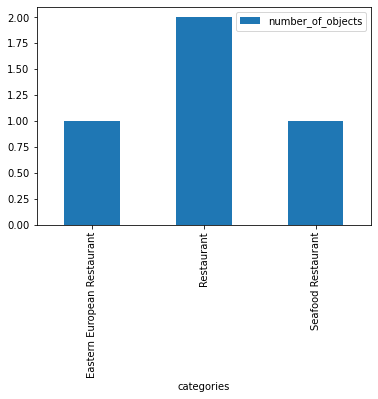

In [669]:
ax = df_categories.plot.bar()

<b>ADD RESTORANTS LOCATION ON MAP<b>

In [670]:
                       
for i in range(0,len(df_total_Restaurants)):
    
    folium.Marker([df_total_Restaurants.iloc[i]['lat'], df_total_Restaurants.iloc[i]['lng']], popup=df_total_Restaurants.iloc[i]['name'], icon=folium.Icon(color='pink')).add_to(map_of_city_Skopje)



<b> <b> 
<b> <b> 
    <b> <b> 
        <b> <b> 
            <b> <b> 
                <b> <b> 







<b>COMPLETE MAP OF CITY SKOPJE WITH ADD RESTAURANTS <b> 

<b>RESORANTS IN DIFFERENT MUNICIPALITIES ARE WITH DIFFERENT COLORS<b>

In [671]:
map_of_city_Skopje 

 
 
 
 
 <b>IF YOU CAN NOT TO OPEN THE MAP DIRECTLY IN THIS NOTEBOOK, PLEASE SEE YOU A LOAD FILE map_Center AND CAN BE OPEN WITH CHROME BROWSER<b>

In [672]:
map_Center.save("map_of_city_Skopje.html")